<a href="https://colab.research.google.com/github/KnightMafiaLau/CryptoTech/blob/main/608_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing Data

In [ ]:
#import the original dataset
from google.colab import files
files.upload()

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


{'Absenteeism_at_work.csv': b'\xef\xbb\xbfID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day ,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours\r\n11,26,7,3,1,289,36,13,33,239554.00,97,0,1,2,1,0,1,90,172,30,4\r\n36,0,7,3,1,118,13,18,50,239554.00,97,1,1,1,1,0,0,98,178,31,0\r\n3,23,7,4,1,179,51,18,38,239554.00,97,0,1,0,1,0,0,89,170,31,2\r\n7,7,7,5,1,279,5,14,39,239554.00,97,0,1,2,1,1,0,68,168,24,4\r\n11,23,7,5,1,289,36,13,33,239554.00,97,0,1,2,1,0,1,90,172,30,2\r\n3,23,7,6,1,179,51,18,38,239554.00,97,0,1,0,1,0,0,89,170,31,2\r\n10,22,7,6,1,361,52,3,28,239554.00,97,0,1,1,1,0,4,80,172,27,8\r\n20,23,7,6,1,260,50,11,36,239554.00,97,0,1,4,1,0,0,65,168,23,4\r\n14,19,7,2,1,155,12,14,34,239554.00,97,0,1,2,1,0,0,95,196,25,40\r\n1,22,7,2,1,235,11,14,37,239554.00,97,0,3,1,0,0,1,88,172,29,8\r\n20,1,7,2,1,260,50,1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv ('Absenteeism_at_work.csv')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",95,0,1,2,1,0,2,100,170,35,0


In [ ]:
df['Work load Average/day '].replace(',','', regex=True, inplace=True)
df['Work load Average/day '] = df['Work load Average/day '].apply(pd.to_numeric,errors='coerce')
result = df.dtypes

print(result)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [ ]:
df.isnull().values.any()

False

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)

def normalize_check(data):
  # normality test
  stat, p = shapiro(data)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
	  print('Sample looks Gaussian (fail to reject H0)')
  else:
	  print('Sample does not look Gaussian (reject H0)')

In [ ]:
normalize_check(df['Transportation expense'])
normalize_check(df['Distance from Residence to Work'])
normalize_check(df['Service time'])
normalize_check(df['Age'])
normalize_check(df['Hit target'])
normalize_check(df['Weight'])
normalize_check(df['Height'])
normalize_check(df['Body mass index'])
normalize_check(df['Absenteeism time in hours'])

Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.951, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.688, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.401, p=0.000
Sample does not look Gaussian (reject H0)


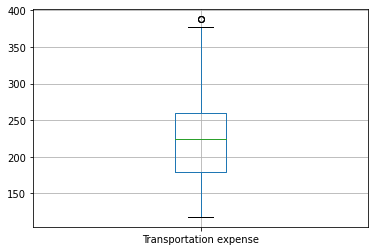

In [ ]:

df.boxplot (column = ['Transportation expense'])

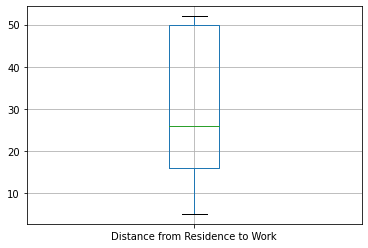

In [ ]:
df.boxplot (column = ['Distance from Residence to Work'])

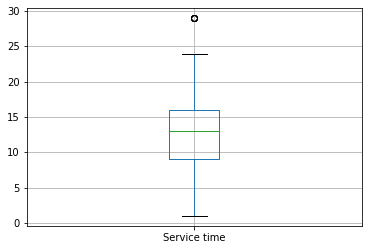

In [ ]:
df.boxplot (column = ['Service time'])

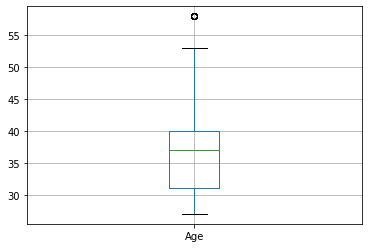

In [ ]:
df.boxplot (column = ['Age'])

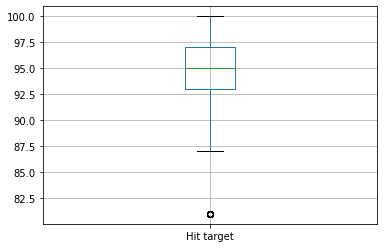

In [ ]:
df.boxplot (column = ['Hit target'])

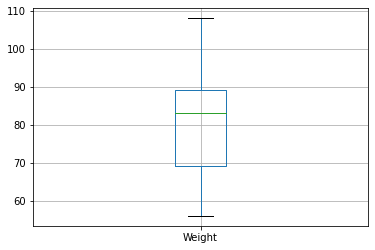

In [ ]:
df.boxplot (column = ['Weight'])

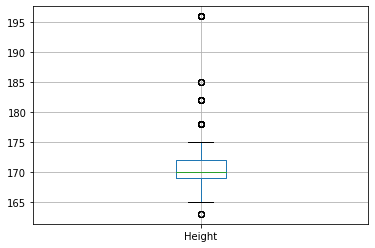

In [ ]:
df.boxplot (column = ['Height'])

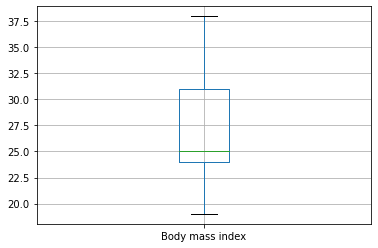

In [ ]:
df.boxplot (column = ['Body mass index'])

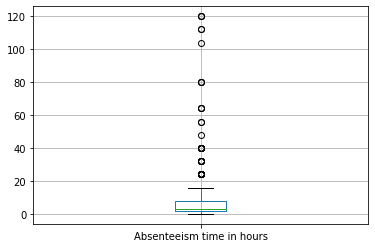

In [ ]:
df.boxplot (column = ['Absenteeism time in hours'])

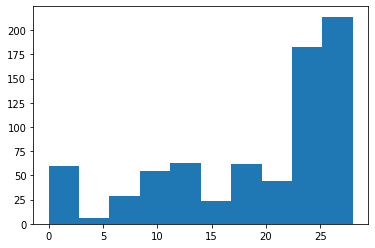

In [ ]:
plt.hist(df['Reason for absence'])
plt.show()

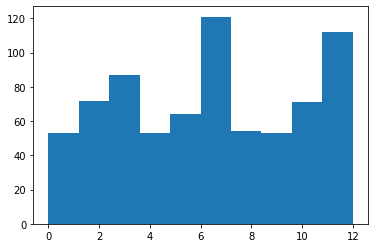

In [ ]:
plt.hist(df['Month of absence'])
plt.show()

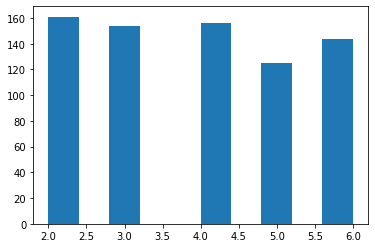

In [ ]:
plt.hist(df['Day of the week'])
plt.show()

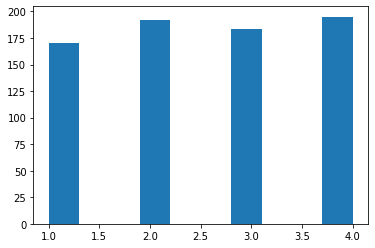

In [ ]:
plt.hist(df['Seasons'])
plt.show()

In [ ]:
df['Work load Average/day '].describe()

count         740
unique         38
top       222,196
freq           36
Name: Work load Average/day , dtype: object

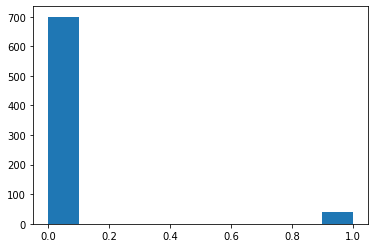

In [ ]:
plt.hist(df['Disciplinary failure'])
plt.show()

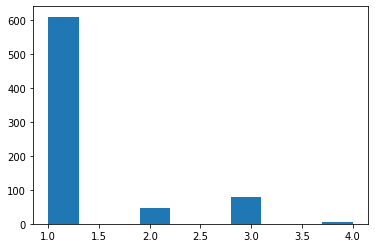

In [ ]:
plt.hist(df['Education'])
plt.show()

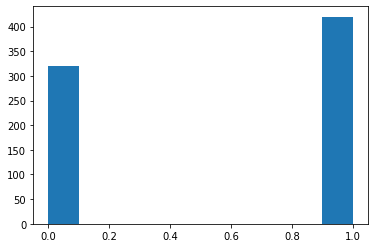

In [ ]:
plt.hist(df['Social drinker'])
plt.show()

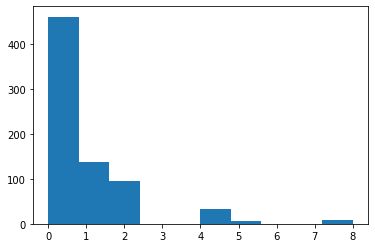

In [ ]:
plt.hist(df['Pet'])
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'], dtype='object')

In [ ]:
scaler = StandardScaler()
drop_df = df.copy()
drop_df = df.drop(columns = ['ID'])

scaled = pd.DataFrame(scaler.fit_transform(drop_df), columns = drop_df.columns)
print (scaled)

     Reason for absence  Month of absence  Day of the week   Seasons  Transportation expense  Distance from Residence to Work  Service time       Age  Work load Average/day   Hit target  Disciplinary failure  Education       Son  Social drinker  Social smoker       Pet    Weight    Height  Body mass index  Absenteeism time in hours
0              0.804938          0.196763        -0.643947 -1.390175                1.011408                         0.429556      0.101770 -0.532868               -0.818212    0.638686             -0.239046  -0.433857  0.893723        0.872872      -0.280566  0.192850  0.851673 -0.019046         0.775932                  -0.219511
1             -2.280124          0.196763        -0.643947 -1.390175               -1.544379                        -1.121694      1.242825  2.092860               -0.818212    0.638686              4.183300  -0.433857 -0.017234        0.872872      -0.280566 -0.566240  1.473056  0.975828         1.009438                  -0.51976

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
y = drop_df['Absenteeism time in hours']
X = scaled.drop(columns=['Absenteeism time in hours'])

X

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
1,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438
2,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438
3,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100
4,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932
736,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954
738,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459


In [ ]:
y

0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

In [ ]:
X.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'], dtype='object')

In [ ]:
folds = KFold(n_splits=4)

scores_svm = []
scores_sgdc = []
scores_rf = []
scores_dt = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    
    
    scores_sgdc.append(get_score(SGDClassifier(loss="hinge", penalty="l2", max_iter=5), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=30), X_train, X_test, y_train, y_test))
    scores_dt.append(get_score(DecisionTreeClassifier(random_state=0), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
scores_rf

[0.4702702702702703,
 0.4702702702702703,
 0.43243243243243246,
 0.3783783783783784]

In [ ]:
np.average(scores_rf)

0.4378378378378379

In [ ]:
scores_dt

[0.34594594594594597,
 0.372972972972973,
 0.32432432432432434,
 0.35135135135135137]

In [ ]:
np.average(scores_dt)

0.34864864864864864

In [ ]:
scores_sgdc

[0.3567567567567568,
 0.3567567567567568,
 0.3783783783783784,
 0.2648648648648649]

In [ ]:
np.average(scores_sgdc)

0.33918918918918917

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
np.average(scores1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.38378378378378375

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),X, y, cv=10)
np.average(scores2)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.40405405405405403

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),X, y, cv=10)
np.average(scores3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.41216216216216217

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=10)
np.average(scores4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.4216216216216216

In [ ]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 20).fit(X_train, y_train)

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
print (feature_importances)

                                 importance
Reason for absence                 0.206042
Work load Average/day              0.106960
Month of absence                   0.099478
Hit target                         0.088755
Day of the week                    0.074366
Disciplinary failure               0.074125
Seasons                            0.053788
Transportation expense             0.048661
Service time                       0.038424
Distance from Residence to Work    0.035089
Age                                0.033293
Weight                             0.030325
Height                             0.025759
Body mass index                    0.025180
Son                                0.023782
Pet                                0.015926
Social drinker                     0.008328
Education                          0.007403
Social smoker                      0.004316


<BarContainer object of 19 artists>

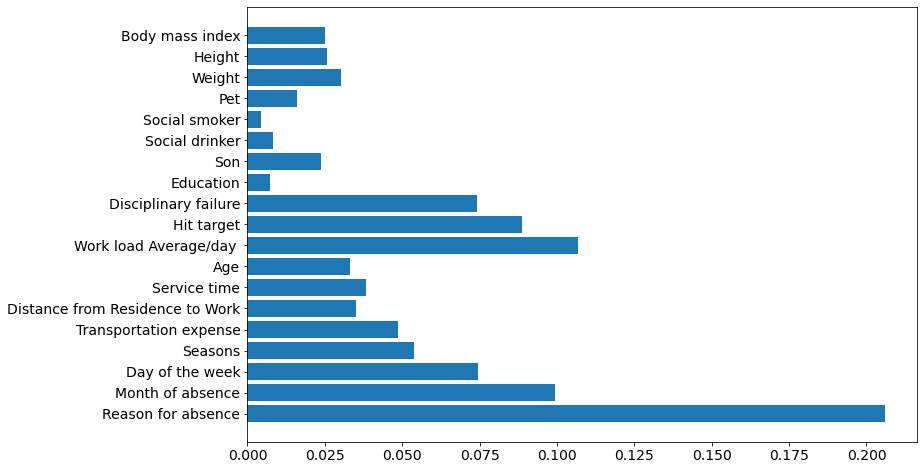

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

plt.barh(X_train.columns, rf.feature_importances_)

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 1.2 MB/s 


In [ ]:
import shap                
shap.initjs()
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(max_depth=10, random_state=42, n_estimators = 20)
rf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=42)

In [ ]:
explainer = shap.TreeExplainer(rf)

# Get SHAP values for the training data from explainer model
shap_values_train = explainer.shap_values(X_train)

# Get SHAP values for the test data from explainer model
shap_values_test = explainer.shap_values(X_test)



In [ ]:
shap_values_train

array([[-2.01969000e+00, -1.45585640e-01, -1.36460751e-01, ...,
         5.17827009e-02, -3.80341419e-02,  5.11559582e-04],
       [ 8.73424472e-01, -5.51639841e-01, -6.33563498e-01, ...,
         2.41282560e+00, -3.23308243e-01, -9.82747430e-02],
       [-2.73277492e+00, -4.27390170e-03, -1.07840975e-01, ...,
        -1.37631408e-01, -7.46945604e-02, -9.49440608e-02],
       ...,
       [-2.48849544e+00, -1.33250336e-01,  3.16674261e-02, ...,
        -1.43738239e-01, -2.48596835e-01, -3.85098148e-02],
       [-1.66019692e+00, -1.16525061e-02, -2.06584369e-01, ...,
        -1.64622180e-01, -2.55082245e-01,  5.05028923e-02],
       [-4.19982525e+00, -1.17938261e-01,  3.67764781e-01, ...,
        -3.30583026e-01, -3.30964112e-01,  8.03797380e-02]])

In [ ]:
# Create a dataframe of the shap values for the training set and the test set
df_shap_train=pd.DataFrame(shap_values_train,columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'])
df_shap_test=pd.DataFrame(shap_values_test,columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'])


In [ ]:
df_shap_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,-2.019690,-0.145586,-0.136461,-0.034002,-0.052654,0.104862,-0.034219,0.307379,-0.328481,-0.229800,0.239656,0.021510,0.387776,0.087767,0.010683,-0.012284,0.051783,-0.038034,0.000512
1,0.873424,-0.551640,-0.633563,-0.074178,4.111160,-0.115547,0.694817,0.797963,1.700654,0.653233,-10.099922,0.001112,0.095507,0.228137,0.005323,0.010474,2.412826,-0.323308,-0.098275
2,-2.732775,-0.004274,-0.107841,-0.006517,-0.611287,0.082631,0.009822,-0.006979,0.142343,-0.146668,0.218726,0.001460,-0.127211,0.061929,0.009518,0.011483,-0.137631,-0.074695,-0.094944
3,3.284739,-0.442843,-0.394802,0.010926,-0.542422,0.075227,-0.204860,-0.238250,-0.237844,-1.582164,0.654990,0.014560,0.056996,0.104939,-0.408210,0.020914,-0.789301,-0.074218,0.046996
4,-3.439125,-0.072050,-0.309315,-0.033208,-0.250332,0.081587,-0.036215,0.032696,-0.154247,-0.349265,0.233041,0.004181,0.113255,0.083980,0.008884,-0.031003,-0.027101,-0.120604,0.039741


In [ ]:
df_shap_test.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,5.262040,1.897586,-0.461222,0.158502,-2.552322,-0.059364,-0.058665,0.072170,-0.002626,0.929654,0.832640,0.049132,-0.093952,0.485089,0.022367,-0.012381,-0.687212,-0.437511,-0.719795
1,-4.168131,0.662875,-0.292325,0.177397,-0.367576,0.015930,-0.002421,0.052930,-0.302985,0.201144,0.270744,0.019968,-0.166668,0.130966,0.009505,0.013012,-0.158717,-0.252662,0.041757
2,-3.048886,0.645125,-0.094241,0.127587,-0.709818,-0.268556,0.022419,-0.151109,-0.236167,0.146110,0.234659,0.014380,-0.217414,-0.143178,0.003434,-0.008763,-0.217592,-0.263738,-0.050777
3,3.969103,1.650166,-0.231999,-0.010635,-2.593322,-0.717562,0.037109,-0.311578,-0.681308,0.165544,0.720798,-0.053290,-0.168257,-0.754761,0.008017,0.005719,-0.580506,-0.441407,0.099243
4,-3.005649,0.627962,-0.011267,0.124909,-0.701076,-0.246740,0.028179,-0.135484,-0.329943,0.124908,0.234247,0.006933,-0.200587,-0.136362,0.002982,-0.008129,-0.210176,-0.254936,-0.040924


In [ ]:
# Base Value: Training data 
print('base array: ','\n',shap_values_train.base[0], '\n')
print('basevalue: ',shap_values_train.base[0][-1])

# Base Value: Test data 
print('base array: ','\n',shap_values_test.base[0], '\n')
print('basevalue: ',shap_values_test.base[0][-1])

# Base Value is is calculated from the training dataset so its same for test data
base_value=shap_values_train.base[0][-1][0]

base array:  
 [[-2.01969000e+00]
 [-1.45585640e-01]
 [-1.36460751e-01]
 [-3.40022146e-02]
 [-5.26543366e-02]
 [ 1.04862494e-01]
 [-3.42193018e-02]
 [ 3.07378734e-01]
 [-3.28480569e-01]
 [-2.29800413e-01]
 [ 2.39655970e-01]
 [ 2.15101524e-02]
 [ 3.87776315e-01]
 [ 8.77672538e-02]
 [ 1.06831727e-02]
 [-1.22838494e-02]
 [ 5.17827009e-02]
 [-3.80341419e-02]
 [ 5.11559582e-04]
 [ 6.71180180e+00]] 

basevalue:  [6.7118018]
base array:  
 [[ 5.26203981e+00]
 [ 1.89758626e+00]
 [-4.61221517e-01]
 [ 1.58502217e-01]
 [-2.55232237e+00]
 [-5.93640002e-02]
 [-5.86647189e-02]
 [ 7.21704152e-02]
 [-2.62598454e-03]
 [ 9.29654203e-01]
 [ 8.32639622e-01]
 [ 4.91322543e-02]
 [-9.39523073e-02]
 [ 4.85088896e-01]
 [ 2.23668368e-02]
 [-1.23813947e-02]
 [-6.87211658e-01]
 [-4.37510970e-01]
 [-7.19795333e-01]
 [ 6.71180180e+00]] 

basevalue:  [6.7118018]


In [ ]:

# Create a  new column for base value
df_shap_train['BaseValue']= base_value

# Add shap values and Base Value
df_shap_train['(ShapValues + BaseValue)']=df_shap_train.iloc[:,0]+df_shap_train.iloc[:,1]+df_shap_train.iloc[:,2]+base_value

# Also create a new columns for the prediction values from training dataset
df_shap_train['prediction']=pd.DataFrame(list(rf.predict(X_train)))

# Note: Prediction Column is added to compare the values of Predicted with the sum of Base and SHAP Values

df_shap_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,BaseValue,(ShapValues + BaseValue),prediction
0,-2.019690,-0.145586,-0.136461,-0.034002,-0.052654,0.104862,-0.034219,0.307379,-0.328481,-0.229800,0.239656,0.021510,0.387776,0.087767,0.010683,-0.012284,0.051783,-0.038034,0.000512,6.711802,4.410065,4.892519
1,0.873424,-0.551640,-0.633563,-0.074178,4.111160,-0.115547,0.694817,0.797963,1.700654,0.653233,-10.099922,0.001112,0.095507,0.228137,0.005323,0.010474,2.412826,-0.323308,-0.098275,6.711802,6.400023,6.400000
2,-2.732775,-0.004274,-0.107841,-0.006517,-0.611287,0.082631,0.009822,-0.006979,0.142343,-0.146668,0.218726,0.001460,-0.127211,0.061929,0.009518,0.011483,-0.137631,-0.074695,-0.094944,6.711802,3.866912,3.198892
3,3.284739,-0.442843,-0.394802,0.010926,-0.542422,0.075227,-0.204860,-0.238250,-0.237844,-1.582164,0.654990,0.014560,0.056996,0.104939,-0.408210,0.020914,-0.789301,-0.074218,0.046996,6.711802,9.158895,6.067173
4,-3.439125,-0.072050,-0.309315,-0.033208,-0.250332,0.081587,-0.036215,0.032696,-0.154247,-0.349265,0.233041,0.004181,0.113255,0.083980,0.008884,-0.031003,-0.027101,-0.120604,0.039741,6.711802,2.891312,2.486700


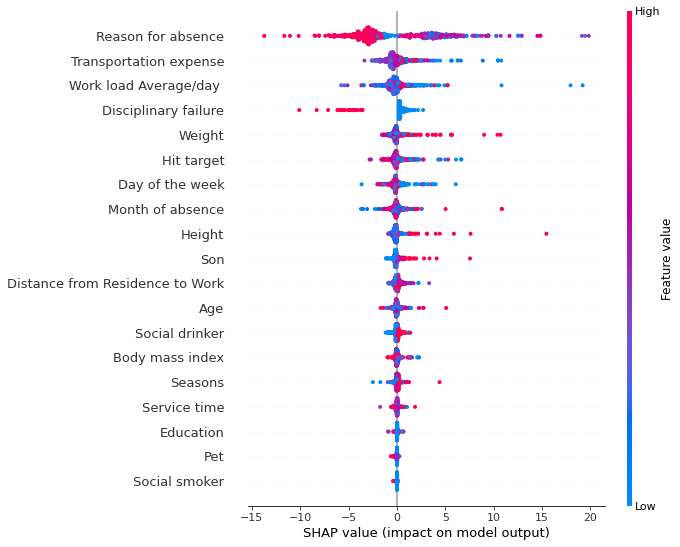

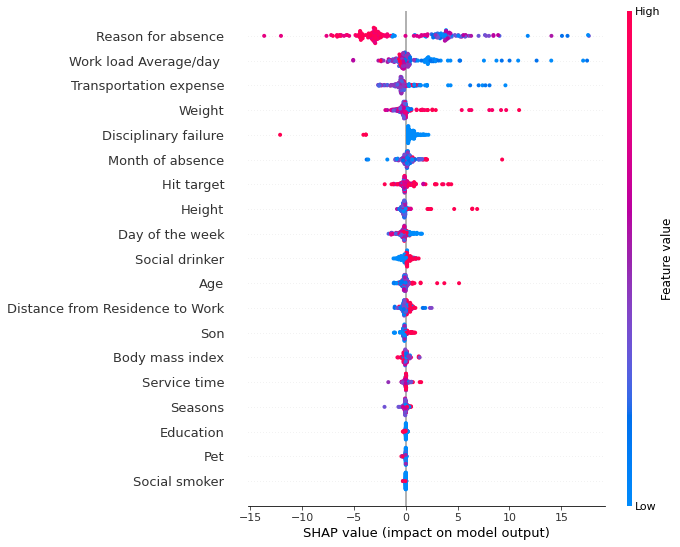

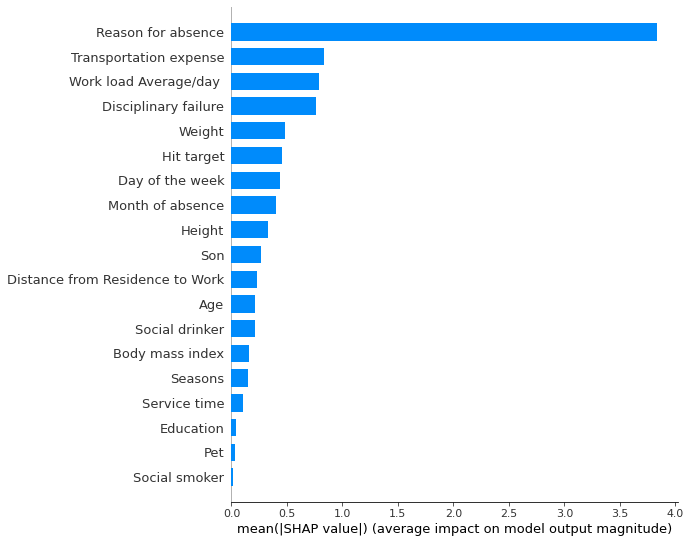

In [ ]:

#SHAP Summary plot for training data
shap.summary_plot(shap_values_train,X_train)

#SHAP Summary plot for test data
shap.summary_plot(shap_values_test,X_test)

#Plot to see the average impat on the model output by each feature.
shap.summary_plot(shap_values_train,X_train,plot_type='bar')